<a href="https://colab.research.google.com/github/AthithepSuksupsri/229351_Lab/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [1]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:19:38--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:19:38 (37.5 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


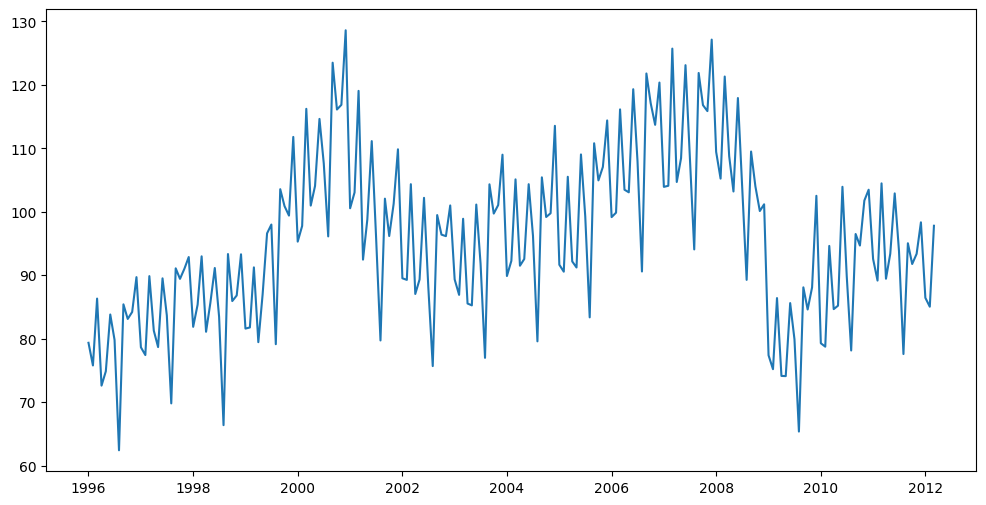

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [4]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [6]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [8]:
data['MA'] = data['value'].rolling(window=5,center=True).mean() #กรณีเลขขี่ MA = 5
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1) #กรณีเลขคู่ MA =12

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,77.782
1996-04-01,4.0,72.60,78.674
1996-05-01,5.0,74.86,79.478
1996-06-01,6.0,83.81,74.696
1996-07-01,7.0,79.80,77.258
1996-08-01,8.0,62.41,78.908
1996-09-01,9.0,85.41,78.988


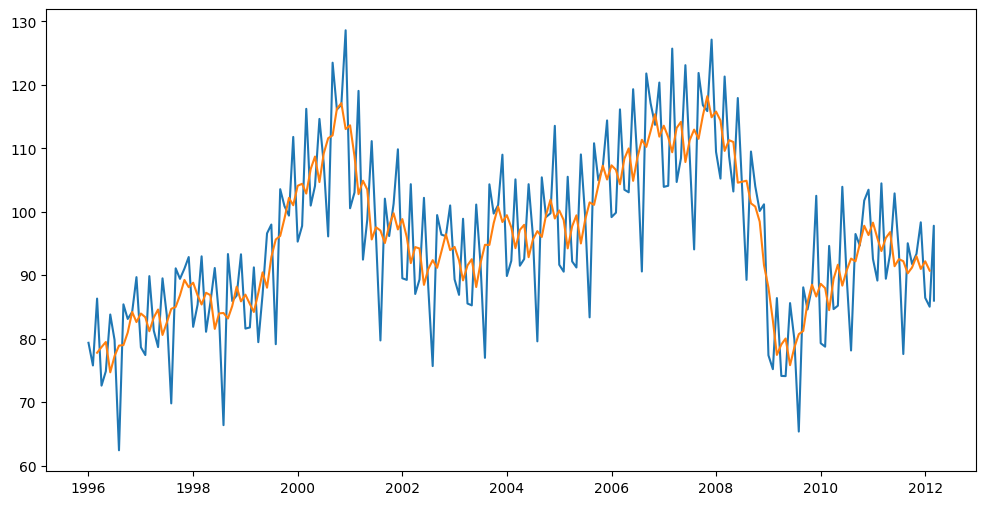

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

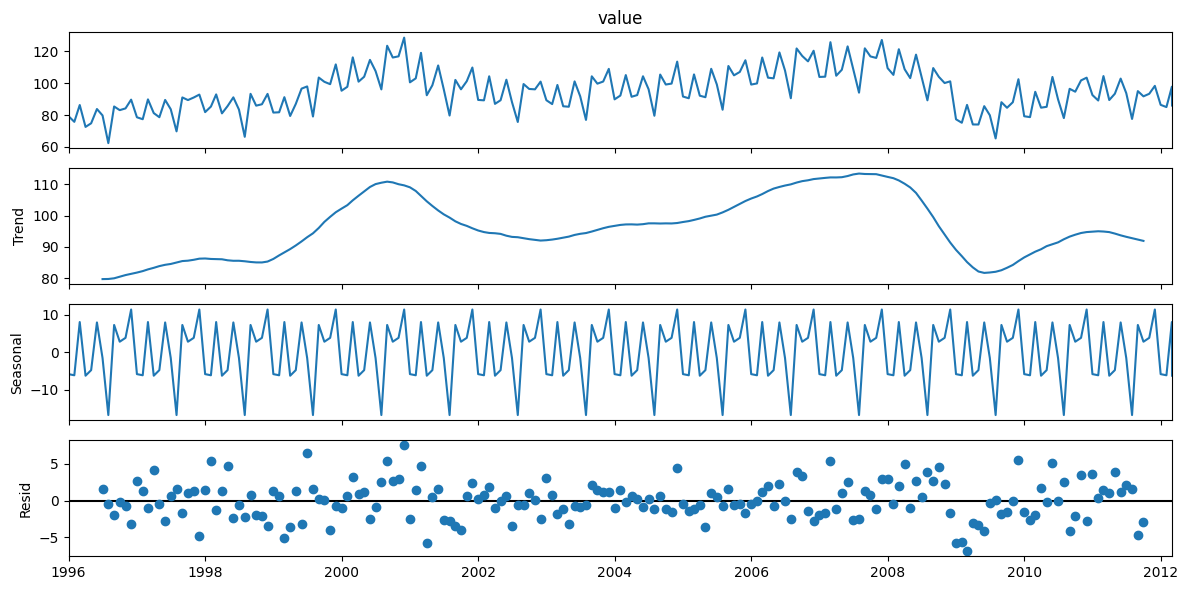

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive', period = 12)

result_add.plot();

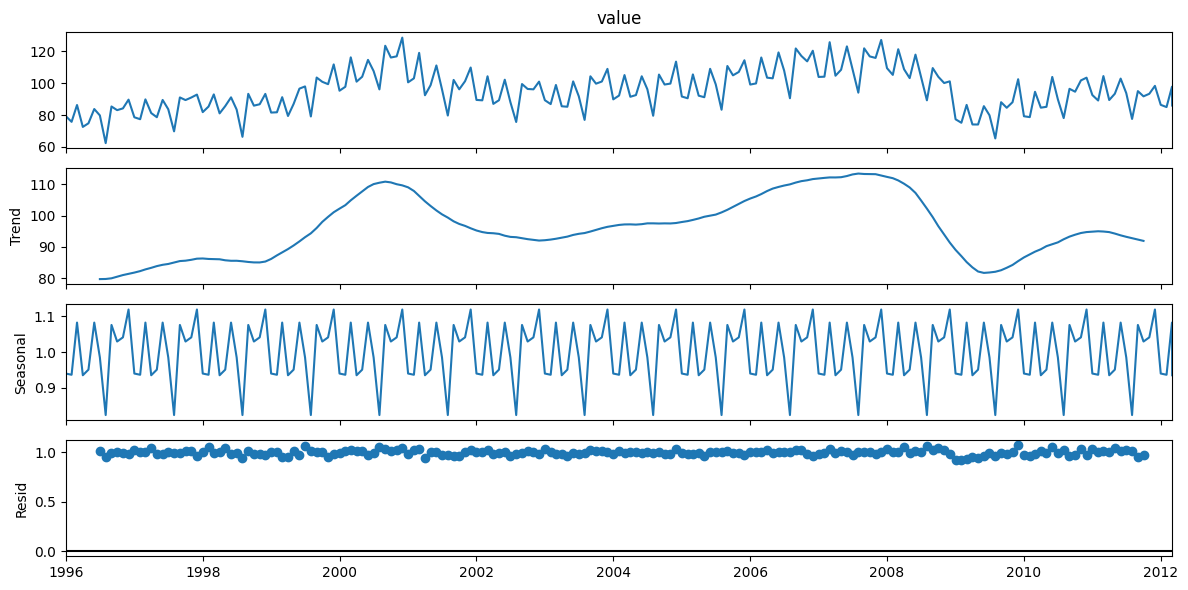

In [13]:
result_mul = seasonal_decompose(data['value'], model='multiplicative', period = 12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [14]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870942
1996-02-01    -6.182553
1996-03-01     8.099891
1996-04-01    -6.298248
1996-05-01    -4.801748
                ...    
2011-12-01    11.464224
2012-01-01    -5.870942
2012-02-01    -6.182553
2012-03-01     8.099891
2012-03-02    -6.298248
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-03-02    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [15]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

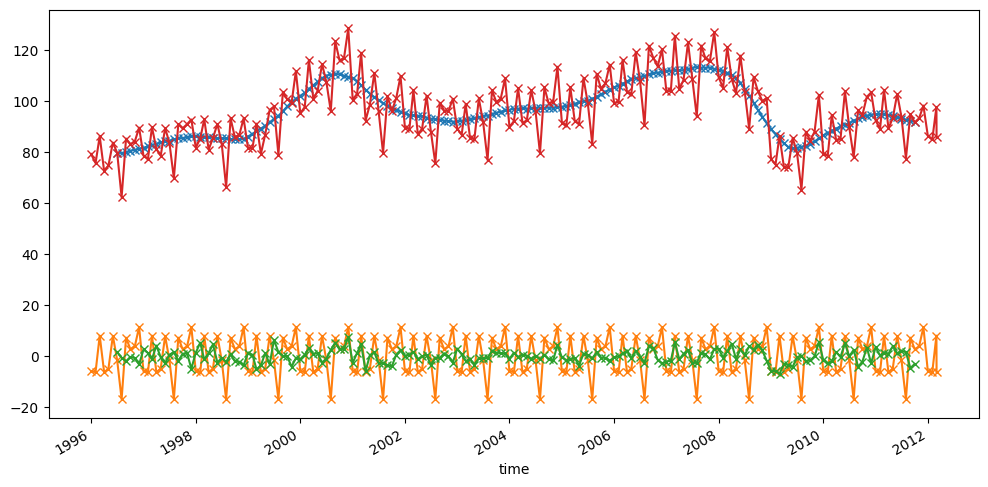

In [44]:
ax1 = result_add.trend.plot(marker = 'x')
ax2 = result_add.seasonal.plot(ax = ax1, marker = 'x')
ax3 = result_add.resid.plot(ax = ax2, marker = 'x')
ax4 = result_add.observed.plot(ax = ax3, marker = 'x')

In [27]:
# 1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
train_data = data.loc['1996-01-01':'2009-12-01']
test_data = data.loc['2010-01-01':'2012-03-01']

print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of             Unnamed: 0   value      MA
time                                  
1996-01-01         1.0   79.35     NaN
1996-02-01         2.0   75.78     NaN
1996-03-01         3.0   86.32  77.782
1996-04-01         4.0   72.60  78.674
1996-05-01         5.0   74.86  79.478
...                ...     ...     ...
2009-08-01       164.0   65.36  80.712
2009-09-01       165.0   88.09  81.208
2009-10-01       166.0   84.60  85.732
2009-11-01       167.0   88.09  88.516
2009-12-01       168.0  102.52  86.646

[168 rows x 3 columns]>
<bound method NDFrame.head of             Unnamed: 0   value      MA
time                                  
2010-01-01       169.0   79.28  88.650
2010-02-01       170.0   78.74  87.964
2010-03-01       171.0   94.62  84.500
2010-04-01       172.0   84.66  89.432
2010-05-01       173.0   85.20  91.658
2010-06-01       174.0  103.94  88.362
2010-07-01       175.0   89.87  90.730
2010-08-01       176.0   78.14  92.626
2010-09-01       1

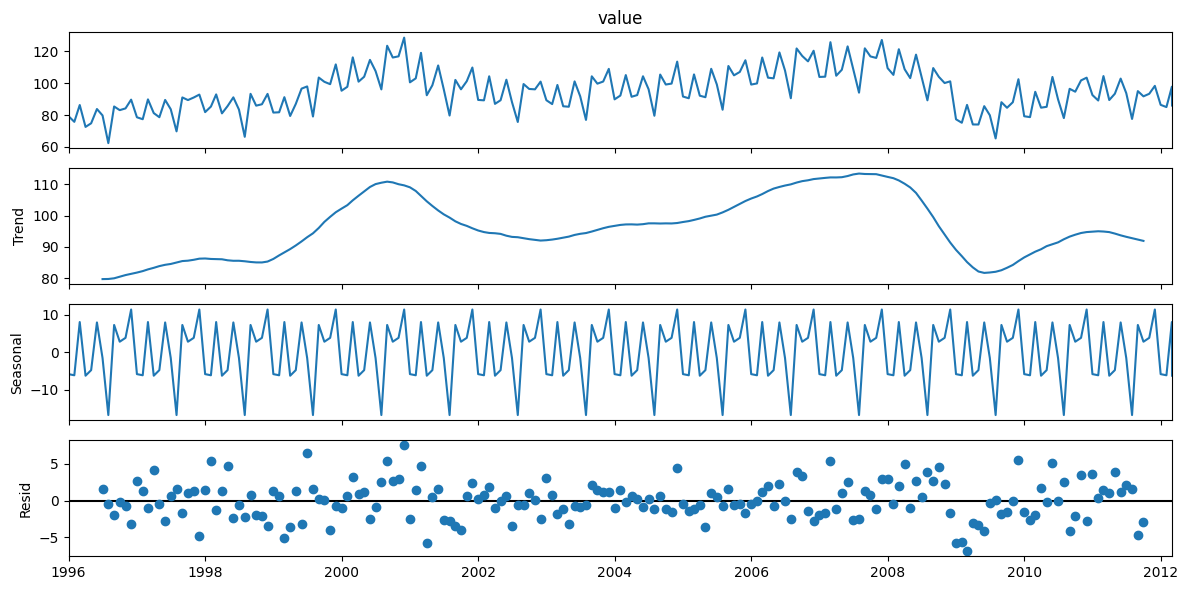

In [39]:
# 1.2 แยกส่วนประกอบ yt=St+Tt+Rt บน training set
result_add = seasonal_decompose(data['value'], model='additive', period = 12)

# Find the last valid T_t in the training set
last_trend_train = result_add.trend.dropna().iloc[-1]
last_resid_train = result_add.resid.dropna().iloc[-1]

result_add.plot();

In [40]:
# 1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set
seasonal_test = result_add.seasonal.loc['2010-01-01':'2012-03-01']

ts_new = last_trend_train + last_resid_train + seasonal_test

print(ts_new)

time
2010-01-01     83.075306
2010-02-01     82.763694
2010-03-01     97.046139
2010-04-01     82.648000
2010-05-01     84.144500
2010-06-01     96.939056
2010-07-01     87.387630
2010-08-01     72.092552
2010-09-01     96.267292
2010-10-01     91.770000
2010-11-01     92.810333
2010-12-01    100.410472
2011-01-01     83.075306
2011-02-01     82.763694
2011-03-01     97.046139
2011-04-01     82.648000
2011-05-01     84.144500
2011-06-01     96.939056
2011-07-01     87.387630
2011-08-01     72.092552
2011-09-01     96.267292
2011-10-01     91.770000
2011-11-01     92.810333
2011-12-01    100.410472
2012-01-01     83.075306
2012-02-01     82.763694
2012-03-01     97.046139
Name: seasonal, dtype: float64


In [41]:
# 2. คำนวณ RMSE โดยใช้ฟังก์ชัน rmse
aligned_test_data, aligned_ts_new = test_data['value'].align(ts_new, join='inner')

rmse_value = rmse(aligned_test_data, aligned_ts_new)
print(f"RMSE: {rmse_value}")

RMSE: 5.0163525354300855


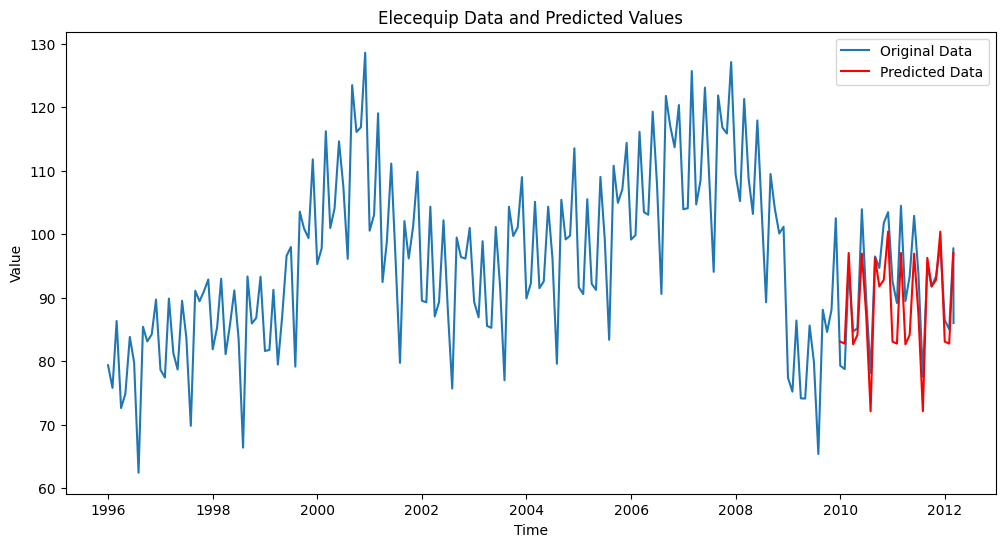

In [42]:
# 3. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้
plt.figure(figsize=(12,6))
plt.plot(data['value'], label='Original Data')
plt.plot(ts_new, label='Predicted Data', color='red')
plt.title('Elecequip Data and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()